In [2]:
import numpy as np
import pandas as pd

data visualization

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

**Influential points** 

In [4]:
from scipy import stats

**Bartlett's sphericity test**

In [5]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

**PCA**

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**TEST OF ASSUMPTIONS**

In [7]:
import statsmodels.api as sm
#Normality

#Homoscadesticity

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#DW Test
from statsmodels.stats.stattools import durbin_watson

Linear Regression
Testing and training data

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import glm

weights = weights of stockpicking concept
' Large B/P ', ' Large ROE ', ' Large S/P ',' Large Return Rate in the last quarter ', ' Large Market Value ',' Small systematic Risk'
outputs = The normalized investment performance indicator 
'Annual Return.1', 'Excess Return.1','Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1','Rel. Win Rate.1'

In [9]:
csvFile = "stock portfolio performance data set.xlsx"

In [10]:
df = pd.read_excel(csvFile,"all period",skiprows=[0],usecols = [1,2,3,4,5,6,13,14,15,16,17,18])

In [11]:
df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059


In [12]:
df.columns

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk', 'Annual Return.1', 'Excess Return.1',
       'Systematic Risk.1', 'Total Risk.1', 'Abs. Win Rate.1',
       'Rel. Win Rate.1'],
      dtype='object')

In [13]:
weights = df.columns[:6]
print(weights)

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'],
      dtype='object')


In [14]:
outputs = df.columns[-6:]
print(outputs)

Index(['Annual Return.1', 'Excess Return.1', 'Systematic Risk.1',
       'Total Risk.1', 'Abs. Win Rate.1', 'Rel. Win Rate.1'],
      dtype='object')


Outputs

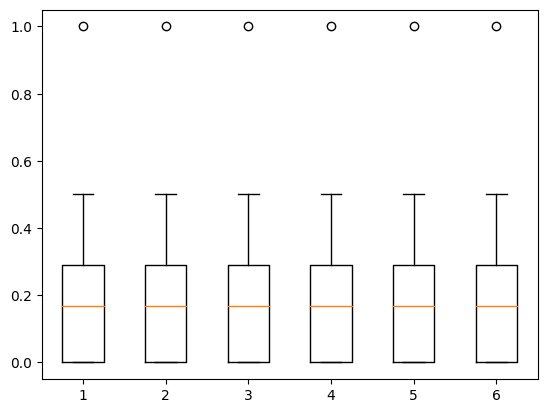

In [15]:
plt.boxplot(df.iloc[:,:6])
plt.show()

weigths

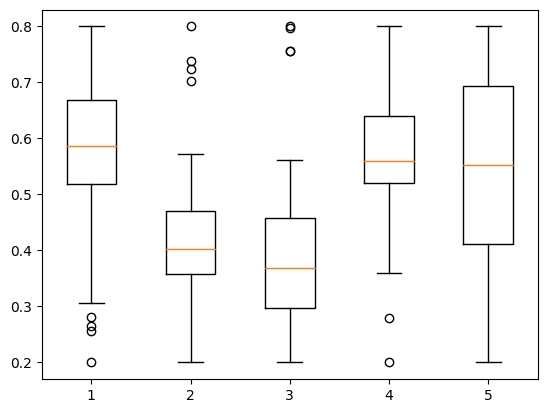

In [16]:
plt.boxplot(df.iloc[:,7:])
plt.show()

Removing influential points



In [17]:
df.shape

(63, 12)

**Menthod1** : Z Score

In [18]:
z_scores = np.abs(stats.zscore(df))
threshold = 3
df_clean = df[(z_scores < threshold).all(axis=1)]
df_clean.shape


(57, 12)

In [19]:
df[~(z_scores < threshold).all(axis=1)]

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
5,0.0,0.0,0.0,0.0,0.0,1.0,0.200000,0.200000,0.490882,0.429063,0.20,0.235294


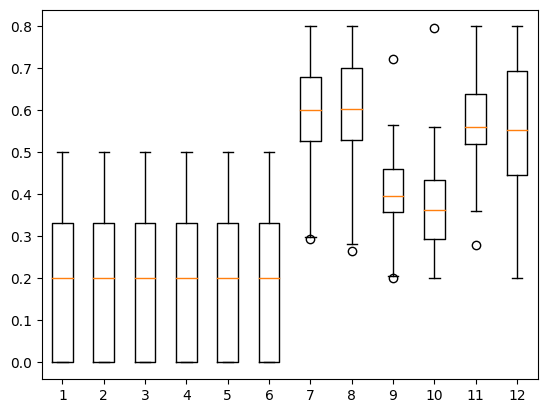

In [20]:
plt.boxplot(df_clean)
plt.show()

In [21]:
df_clean = df

In [22]:
weight_df = df_clean.iloc[:,:6].copy()
outputs_df = df_clean.iloc[:,-6:].copy()

Corelation matrix

In [23]:
corr_matrix = df_clean.corr()
corr_matrix

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
Large B/P,1.000000,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,0.204163,0.223066,0.044638,0.290721,0.330388,-0.096637
Large ROE,-0.200000,1.000000,-0.200000,-0.200000,-0.200000,-0.200000,0.395471,0.362831,-0.188823,-0.302810,0.260598,0.718742
Large S/P,-0.200000,-0.200000,1.000000,-0.200000,-0.200000,-0.200000,0.432089,0.348579,0.309397,0.429616,-0.052567,-0.016360
Large Return Rate in the last quarter,-0.200000,-0.200000,-0.200000,1.000000,-0.200000,-0.200000,-0.205198,-0.249988,0.301207,0.237721,-0.198890,-0.308811
Large Market Value,-0.200000,-0.200000,-0.200000,-0.200000,1.000000,-0.200000,-0.444855,-0.434440,-0.146320,-0.491467,0.123486,0.022453
Small systematic Risk,-0.200000,-0.200000,-0.200000,-0.200000,-0.200000,1.000000,-0.381609,-0.250001,-0.320038,-0.163721,-0.462812,-0.318949
Annual Return.1,0.204163,0.395471,0.432089,-0.205198,-0.444855,-0.381609,1.000000,0.975546,-0.214713,0.034485,0.604250,0.589791
Excess Return.1,0.223066,0.362831,0.348579,-0.249988,-0.434440,-0.250001,0.975546,1.000000,-0.404418,-0.104528,0.644373,0.589178
Systematic Risk.1,0.044638,-0.188823,0.309397,0.301207,-0.146320,-0.320038,-0.214713,-0.404418,1.000000,0.865696,-0.473683,-0.409389
Total Risk.1,0.290721,-0.302810,0.429616,0.237721,-0.491467,-0.163721,0.034485,-0.104528,0.865696,1.000000,-0.381860,-0.473022


using seaborn

<Axes: >

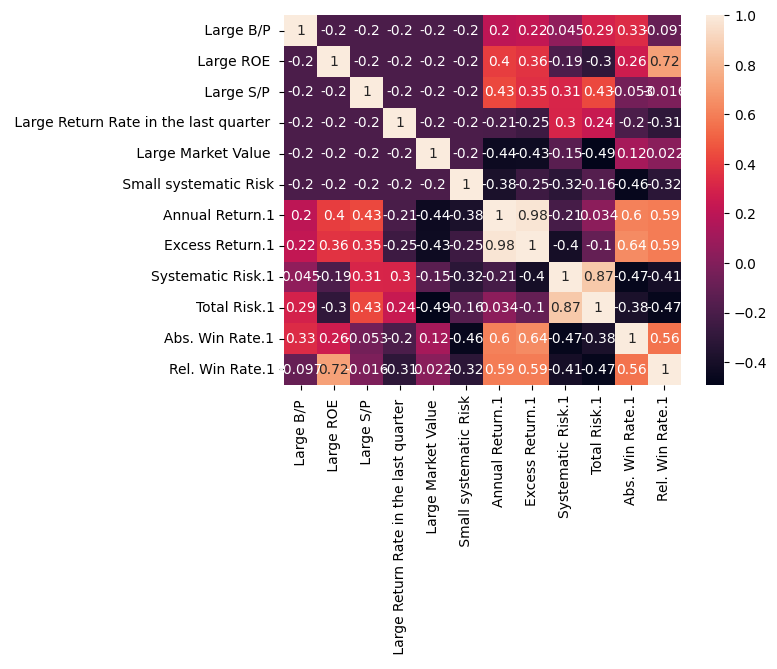

In [24]:
sns.heatmap(corr_matrix, annot=True)

Bartlett's sphericity test

In [25]:
# Perform Bartlett's sphericity test
chi_square_value, p_value = calculate_bartlett_sphericity(weight_df)

# Print the test results
print('Bartlett Sphericity Test:')
print("Chi-square value:", chi_square_value)
print("P-value:", p_value)


Bartlett Sphericity Test:
Chi-square value: 749.0536602587168
P-value: 6.429146777304694e-150


PCA

In [26]:
weight_df.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
cov_mat = np.cov(weight_df.values, rowvar=False)

# Step 3: Compute the eigenvectors and eigenvalues
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(eig_vals)

[4.76666774e-02 5.06912442e-08 4.76666774e-02 4.76666774e-02
 4.76666774e-02 4.76666774e-02]


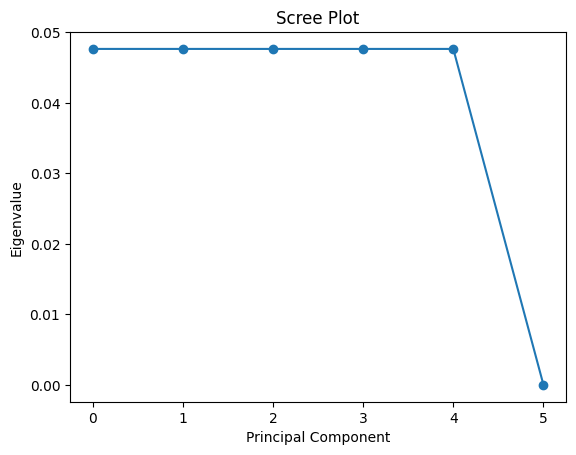

In [28]:
plt.plot(np.arange(0,6), sorted(eig_vals, reverse=True), marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()


In [29]:
n_components = 5 # replace with your choice

pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(weight_df)

Test of assumptions

Multi Colinearity

**VIF**

In [30]:
for i in range(5):
    print(f'VIF of column {i}: {variance_inflation_factor(data_pca,i):.2f}')

VIF of column 0: 1.00
VIF of column 1: 1.00
VIF of column 2: 1.00
VIF of column 3: 1.00
VIF of column 4: 1.00


Auto Corelation

**DW test**

In [31]:
dw_test = durbin_watson(data_pca, axis=0)

print('DW statistic for each column:', dw_test)

DW statistic for each column: [1.76041617 2.42537902 1.81666301 1.97479541 2.00524482]


Remedy

In [32]:
arr = np.delete(data_pca, [2,4], axis=1)
# print(arr)
dw_test = durbin_watson(arr, axis=0)
print('DW statistic for each column:', dw_test)

DW statistic for each column: [1.76041617 2.42537902 1.97479541]


Normality

In [33]:
from scipy.stats import normaltest
for i in range(3):
    print(f'Normality test result for column {i}:',normaltest(arr[:, i]))

Normality test result for column 0: NormaltestResult(statistic=5.532932425964223, pvalue=0.06288383063291204)
Normality test result for column 1: NormaltestResult(statistic=20.401271417420254, pvalue=3.714669669792771e-05)
Normality test result for column 2: NormaltestResult(statistic=1.467852193560676, pvalue=0.480020678029318)


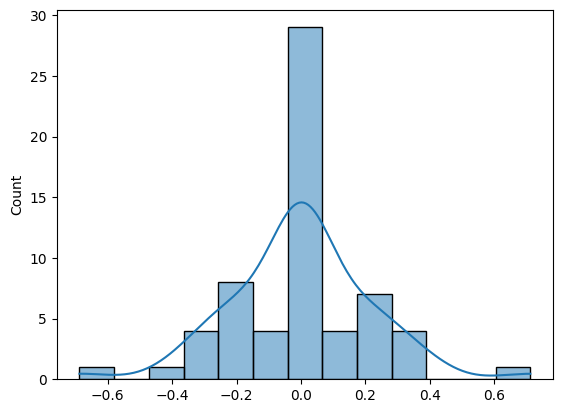

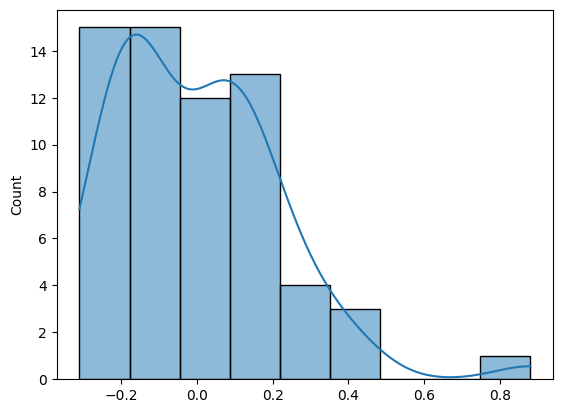

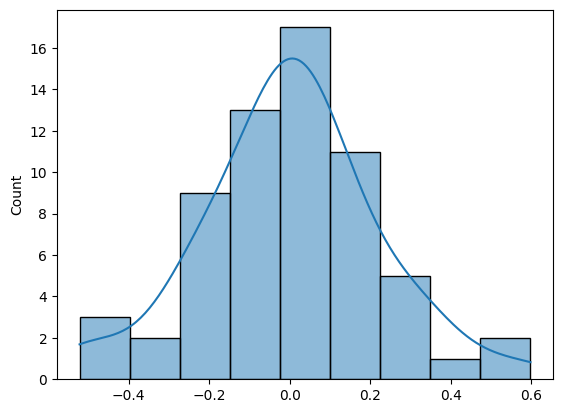

In [34]:
# Create histogram plots
sns.histplot(arr[:,0], kde=True)
plt.show()

sns.histplot(arr[:,1], kde=True)
plt.show()

sns.histplot(arr[:,2], kde=True)
plt.show()

Remedy

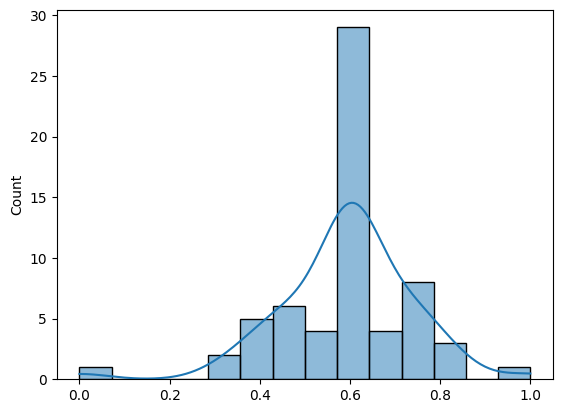

In [35]:
from scipy.stats import boxcox

data = arr[:,0]

data_pos = data - np.min(data) + 0.1

data_bc = boxcox(data_pos, lmbda=0.6)

data_norm = (data_bc - np.min(data_bc)) / (np.max(data_bc) - np.min(data_bc))

sns.histplot(data_norm, kde=True)
plt.show()



In [36]:
arr[:,0] = data_norm

**MODEL**

In [37]:
model = sm.OLS(outputs_df.iloc[:,0], sm.add_constant(arr)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual Return.1   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     24.88
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.58e-10
Time:                        23:54:50   Log-Likelihood:                 63.791
No. Observations:                  63   AIC:                            -119.6
Df Residuals:                      59   BIC:                            -111.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3237      0.048      6.800      0.0

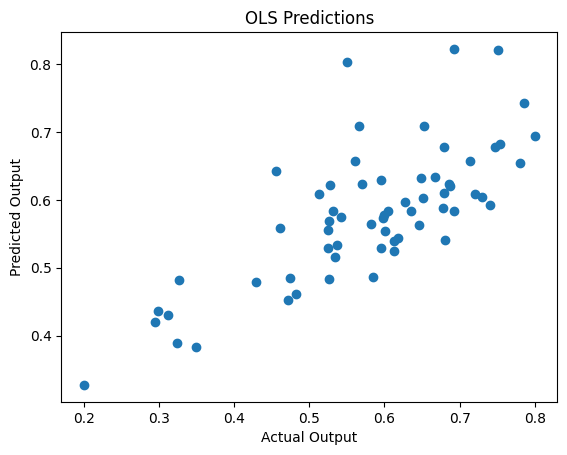

In [38]:
predictions = model.predict(sm.add_constant(arr))

plt.scatter(outputs_df.iloc[:,0], predictions)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('OLS Predictions')
plt.show()

Homoscedasticity

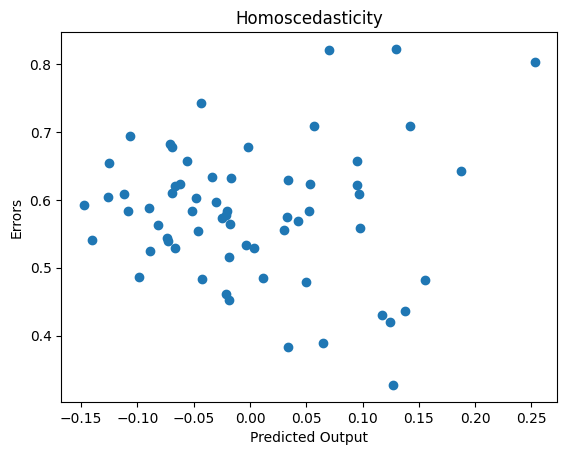

In [39]:
error  = predictions - outputs_df.iloc[:,0]

plt.scatter(error, predictions)
plt.xlabel('Predicted Output')
plt.ylabel('Errors')
plt.title('Homoscedasticity')
plt.show()

In [40]:
model = sm.OLS(outputs_df.iloc[:,1], sm.add_constant(arr)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Excess Return.1   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     15.39
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.65e-07
Time:                        23:54:51   Log-Likelihood:                 54.525
No. Observations:                  63   AIC:                            -101.1
Df Residuals:                      59   BIC:                            -92.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3808      0.055      6.905      0.0

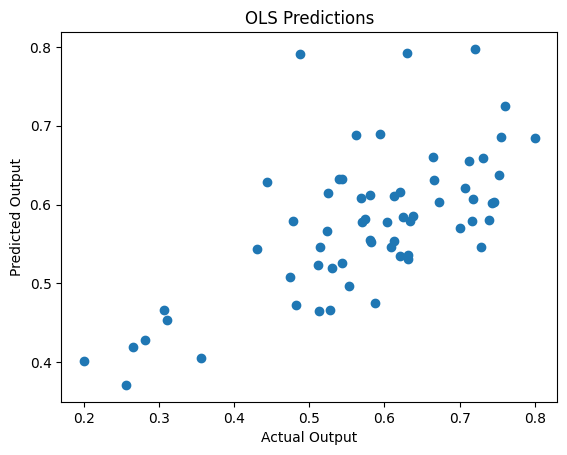

In [41]:
predictions = model.predict(sm.add_constant(arr))

# Plot the predicted values against the actual values
plt.scatter(outputs_df.iloc[:,1], predictions)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('OLS Predictions')
plt.show()

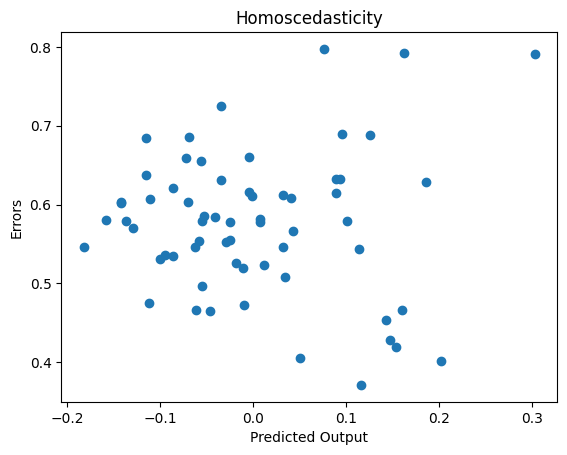

In [42]:
error  = predictions - outputs_df.iloc[:,1]

plt.scatter(error, predictions)
plt.xlabel('Predicted Output')
plt.ylabel('Errors')
plt.title('Homoscedasticity')
plt.show()

In [43]:
model = sm.OLS(outputs_df.iloc[:,2], sm.add_constant(arr)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Systematic Risk.1   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.353
Date:                Wed, 05 Apr 2023   Prob (F-statistic):            0.00775
Time:                        23:54:51   Log-Likelihood:                 51.950
No. Observations:                  63   AIC:                            -95.90
Df Residuals:                      59   BIC:                            -87.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2465      0.057      4.291      0.0

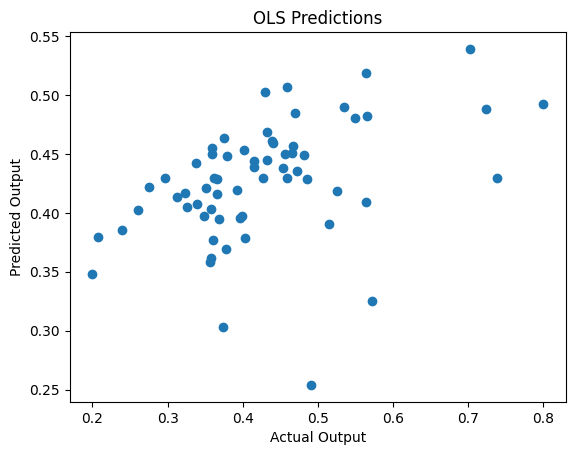

In [44]:
predictions = model.predict(sm.add_constant(arr))

# Plot the predicted values against the actual values
plt.scatter(outputs_df.iloc[:,2], predictions)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('OLS Predictions')
plt.show()

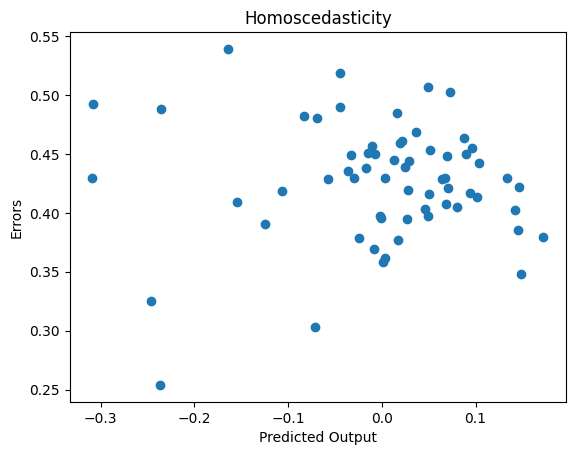

In [45]:
error  = predictions - outputs_df.iloc[:,2]

plt.scatter(error, predictions)
plt.xlabel('Predicted Output')
plt.ylabel('Errors')
plt.title('Homoscedasticity')
plt.show()

In [46]:
model = sm.OLS(outputs_df.iloc[:,3], sm.add_constant(arr)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Risk.1   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     5.943
Date:                Wed, 05 Apr 2023   Prob (F-statistic):            0.00130
Time:                        23:54:52   Log-Likelihood:                 44.817
No. Observations:                  63   AIC:                            -81.63
Df Residuals:                      59   BIC:                            -73.06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1857      0.064      2.886      0.0

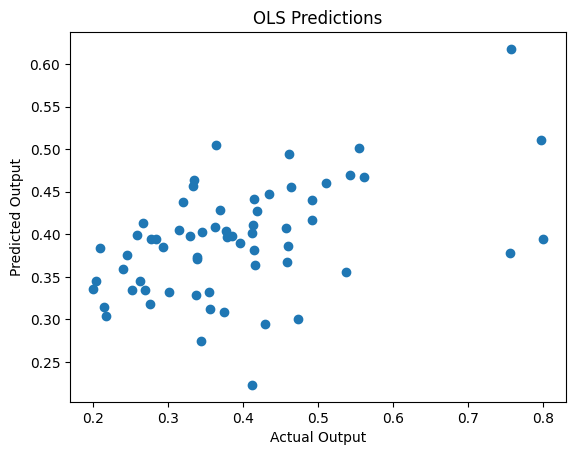

In [47]:
predictions = model.predict(sm.add_constant(arr))

# Plot the predicted values against the actual values
plt.scatter(outputs_df.iloc[:,3], predictions)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('OLS Predictions')
plt.show()

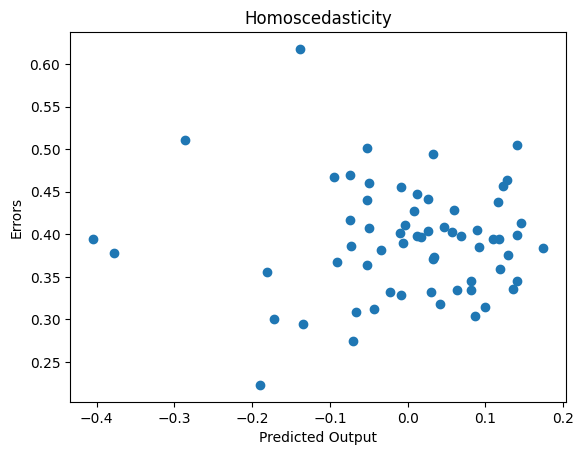

In [48]:
error  = predictions - outputs_df.iloc[:,3]

plt.scatter(error, predictions)
plt.xlabel('Predicted Output')
plt.ylabel('Errors')
plt.title('Homoscedasticity')
plt.show()

In [49]:
model = sm.OLS(outputs_df.iloc[:,4], sm.add_constant(arr)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Abs. Win Rate.1   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     6.320
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           0.000864
Time:                        23:54:52   Log-Likelihood:                 57.362
No. Observations:                  63   AIC:                            -106.7
Df Residuals:                      59   BIC:                            -98.15
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4488      0.053      8.512      0.0

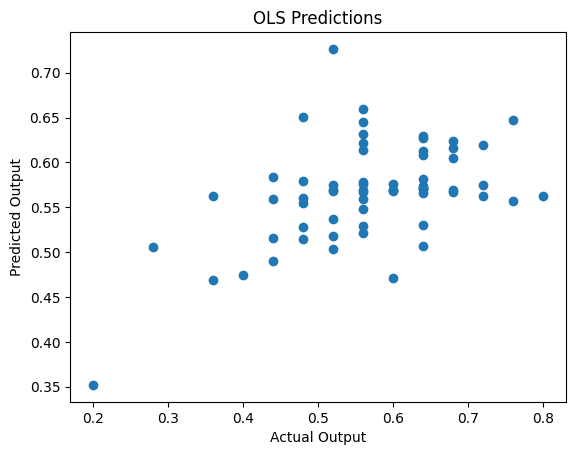

In [50]:
predictions = model.predict(sm.add_constant(arr))

# Plot the predicted values against the actual values
plt.scatter(outputs_df.iloc[:,4], predictions)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('OLS Predictions')
plt.show()

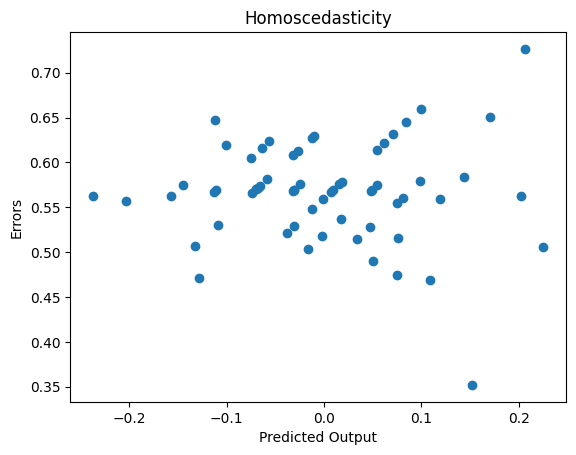

In [51]:
error  = predictions - outputs_df.iloc[:,4]

plt.scatter(error, predictions)
plt.xlabel('Predicted Output')
plt.ylabel('Errors')
plt.title('Homoscedasticity')
plt.show()

In [52]:
model = sm.OLS(outputs_df.iloc[:,5], sm.add_constant(arr)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Rel. Win Rate.1   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     27.10
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           3.81e-11
Time:                        23:54:53   Log-Likelihood:                 54.062
No. Observations:                  63   AIC:                            -100.1
Df Residuals:                      59   BIC:                            -91.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4713      0.056      8.483      0.0

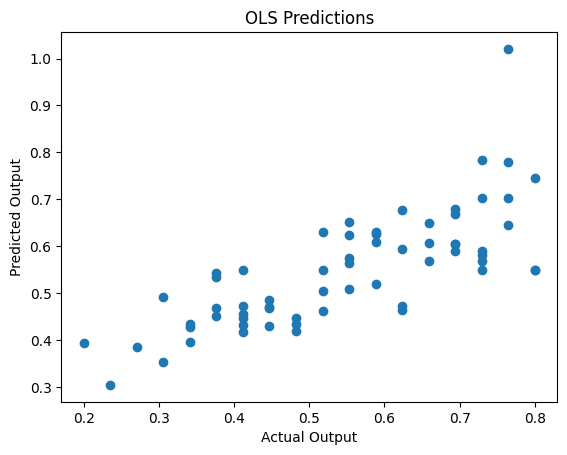

In [53]:
predictions = model.predict(sm.add_constant(arr))

# Plot the predicted values against the actual values
plt.scatter(outputs_df.iloc[:,5], predictions)
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('OLS Predictions')
plt.show()

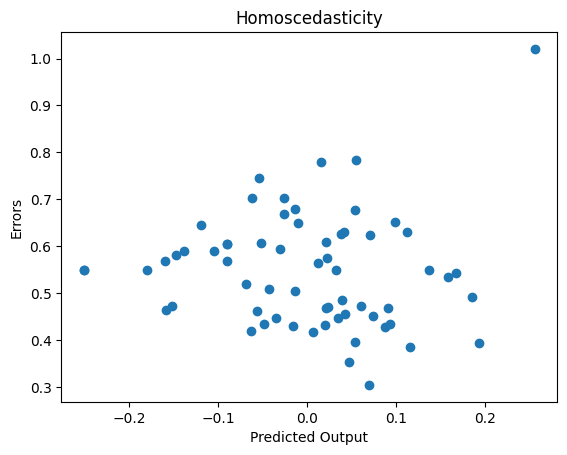

In [54]:
error  = predictions - outputs_df.iloc[:,5]

plt.scatter(error, predictions)
plt.xlabel('Predicted Output')
plt.ylabel('Errors')
plt.title('Homoscedasticity')
plt.show()